In [ ]:
from google.colab import drive
drive.mount('/content/drive') #akses ke google drive

Mounted at /content/drive


In [ ]:
pip install nltk

In [ ]:
pip install Sastrawi

     |████████████████████████████████| 215kB 8.1MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Train Data
trainDf =  pd.read_excel('/content/drive/My Drive/ml_data/train_v1.xlsx')
print("Train shape data:",trainDf.shape)

NegatifDf = trainDf[trainDf["Sentimen"]=="Negatif"].drop("Sentimen",axis=1)
NegatifDf["Sentimen"] = 0

PositifDf = trainDf[trainDf["Sentimen"]=="Positif"].drop("Sentimen",axis=1)
PositifDf["Sentimen"] = 1

trainDf = pd.concat([NegatifDf,PositifDf],ignore_index=True)
print("Final shape of train dataset:",trainDf.shape)

Train shape data: (640, 2)
Final shape of train dataset: (640, 2)


In [ ]:
trainDf[300:330]

,Tweet,Sentimen
300,"Yang ga taat nyalahin pemerintah plin plan, pe...",0
301,Saya setuju pemerintah Jokowi plin plan ga teg...,0
302,Situasi covid dlm negeri semakin mengerikan. B...,0
303,Sejak awal Covid-19 muncul sampek sekarang kan...,0
304,"Pemerintah yang kurang tegas, terkesan plin p...",0
305,"Saya curiga,kenapa pemerintah plin plan mengha...",0
306,Pemerintah pusat fokus benahi ekonomi dan tida...,0
307,"Bukan masalah suka gak suka, internal pemerint...",0
308,Jujur asli pemerintah emang plin plan dan engg...,0
309,#TerserahIndonesia #TerserahIndonesia PSBB di ...,0


In [ ]:
#Train Data
testDf =  pd.read_excel('/content/drive/My Drive/ml_data/test_v1.xlsx')
print("Train shape data:",testDf.shape)

NegatifDf = testDf[testDf["Sentimen"]=="Negatif"].drop("Sentimen",axis=1)
NegatifDf["Sentimen"] = 0

PositifDf = testDf[testDf["Sentimen"]=="Positif"].drop("Sentimen",axis=1)
PositifDf["Sentimen"] = 1

testDf = pd.concat([NegatifDf,PositifDf],ignore_index=True)
print("Final shape of train dataset:",testDf.shape)

Train shape data: (161, 2)
Final shape of train dataset: (161, 2)


In [ ]:
testDf.head(160)

,Tweet,Sentimen
0,pemerintah jokowi gagal melindungi rakyatnya p...,0
1,tta pi belanda jajah indonesia 350thn rakyat i...,0
2,kondisi indonesia pandemi covid 19 dimanfaatka...,0
3,pemerintah sengaja meliburkan perguruan mereda...,0
4,survei indonesia barometer pemerintah gagal at...,0
...,...,...
155,Pekerjaan dilakukan dengan menerapkan protokol...,1
156,himbauan dan anjuran pemerintah tidak untuk di...,1
157,Bhabinkamtibmas Polsek puding besar memberikan...,1
158,Apalagi Jakarta sebagai episentrum Covid-19 se...,1


In [ ]:
data_train = trainDf
data_test = testDf

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop=set(stopwords.words("indonesian"))
stop_bow = set(stopwords.words("indonesian"))
stop_bow.discard("tidak")
factory = StemmerFactory()
stemmer = factory.create_stemmer()
#stemming_word = stemmer.stem()
#sno = nltk.stem.SnowballStemmer("english")

train_text=data_train["Tweet"]
cleaned_text_bow=[]
cleaned_text=[]
for line in train_text:
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    hashtags = re.compile("#|\*")
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)

    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = stemmer.stem(word)
            filtered_words.append(word)
        if(word not in stop_bow):
            word = stemmer.stem(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_train_bow = pd.DataFrame(data=cleaned_text_bow,columns=["Tweet"])
data_train_bow["Sentimen"] = data_train["Sentimen"]
data_train["Tweet"]=cleaned_text
print(data_train.head(10))
print()
print(data_train_bow.head(10))
print()

                                               Tweet  Sentimen
0  [golong, yg, ga, tuju, perintah, tangan, covid...         0
1  [covid, elit, global, main, perintah, masyarak...         0
2  [yups, egois, materi, krn, rs, yg, pasien, cov...         0
3  [klo, gw, perintah, tuh, terap, herd, immunity...         0
4  [bilang, untung, ribu, warga, mati, daftar, ko...         0
5                    [bahaya, covid, perintah, atas]         0
6  [salah, keluarga, menit, tinggal, gara, gara, ...         0
7  [bgmn, turun, masy, bnyk, yg, blm, sadar, peri...         0
8    [perintah, sepele, covid, suruh, damai, dengan]         0
9  [ga, damai, covid, rang, covid, protocol, seha...         0

                                               Tweet  Sentimen
0   golong yg ga tuju perintah tangan covid tp yg...         0
1   covid elit global main perintah masyarakat re...         0
2   yups egois materi krn rs yg pasien covid dpt ...         0
3   klo gw perintah tuh terap herd immunity perin...  

In [ ]:
#test cleaning
test_text=data_test["Tweet"]
cleaned_text_bow=[]
cleaned_text=[]
for line in test_text:
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)

    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = stemmer.stem(word)
            filtered_words.append(word)
        if(word not in stop_bow):
            word = stemmer.stem(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_test_bow = pd.DataFrame(data=cleaned_text_bow,columns=["Tweet"])
data_test_bow["Sentimen"] = data_test["Sentimen"]
data_test["Tweet"]=cleaned_text
print(data_test.head(10))
print()
print(data_test_bow.head(10))
print()

                                               Tweet  Sentimen
0  [perintah, jokowi, gagal, lindung, rakyat, pan...         0
1  [tta, pi, belanda, jajah, indonesia, thn, raky...         0
2  [kondisi, indonesia, pandemi, covid, manfaat, ...         0
3  [perintah, sengaja, libur, guru, redam, suara,...         0
4  [survei, indonesia, barometer, perintah, gagal...         0
5  [sengaja, perintah, gagal, tangan, covid, paks...         0
6                   [perintah, gagal, tangan, covid]         0
7  [perintah, indonesia, nilai, gagal, perang, la...         0
8  [upaya, perintah, hidup, ekonomi, tanggulang, ...         0
9  [ngopi, gerombol, diskusi, perintah, gagal, ta...         0

                                               Tweet  Sentimen
0   perintah jokowi gagal lindung rakyat pandemi ...         0
1   tta pi belanda jajah indonesia thn rakyat ind...         0
2   kondisi indonesia pandemi covid manfaat berit...         0
3   perintah sengaja libur guru redam suara mahas...  

In [ ]:
#listStopword =  set(stopwords.words('indonesian'))
#listStopword

In [ ]:
import gensim
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

In [ ]:
#Train on text data
list_of_sent = data_train["Tweet"]
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=4,size=200, workers=4, sg=1) #size = ukuran vector yg diinginkan, default cbow
w2v_words=list(w2v_model.wv.vocab) #corpus/vocab ambil dr kata yg ada di data train 

In [ ]:
len(w2v_words)

539

In [ ]:
#Vectorize train text data
listof_sent_vec=[]
for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(200) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_train["Sentimen"]
list_col=tuple(range(200))
Scaler = StandardScaler()
train_vec = Scaler.fit_transform(listof_sent_vec)
W2v_data_train=pd.DataFrame(data=train_vec, columns=list_col)
W2v_data_train["Sentimen"] = Label
print(W2v_data_train.head(10))
print(W2v_data_train.shape)

100%|██████████| 640/640 [00:00<00:00, 6807.00it/s]

          0         1         2  ...       198       199  Sentimen
0 -1.456860 -0.471422 -0.496446  ...  0.307035  0.354797         0
1 -1.510646 -0.809188 -0.927835  ...  0.830435  0.977097         0
2 -0.154921  0.484889  0.214612  ... -0.374557 -0.506176         0
3 -0.484088  0.002101 -0.330604  ...  0.351350  0.224772         0
4 -0.242615  0.305686 -0.127978  ...  0.242845  0.075801         0
5  0.467299 -1.086624 -0.599880  ...  0.891804  1.181470         0
6 -0.911523 -0.663828 -0.132020  ...  0.530692  0.251749         0
7  0.452820  1.407324  1.444882  ... -1.681689 -1.450635         0
8  1.391545  0.008232  0.793206  ... -1.137143 -0.514541         0
9 -0.498159  0.252964 -0.046061  ...  0.233136  0.069423         0

[10 rows x 201 columns]
(640, 201)


In [ ]:
#test
list_of_sent= data_test["Tweet"]
listof_sent_vec=[]

for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(200) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_test["Sentimen"]
list_col=tuple(range(200))
test_vec = Scaler.transform(listof_sent_vec)
W2v_data_test=pd.DataFrame(data=test_vec, columns=list_col)
W2v_data_test["Sentimen"] = Label
print(W2v_data_test.head(10))
print(W2v_data_test.shape)

100%|██████████| 161/161 [00:00<00:00, 7788.10it/s]

          0         1         2  ...       198       199  Sentimen
0 -0.669978 -1.190009 -1.405864  ...  1.303876  1.378859         0
1 -0.180147  0.570784 -0.066699  ...  0.017355  0.019024         0
2  0.213778  0.402609 -0.368500  ...  0.513624  0.359796         0
3  1.862486  1.903485  2.766884  ... -2.661921 -2.650799         0
4  2.779037  3.285389  3.280700  ... -3.208420 -3.070888         0
5  0.747931  1.094473  1.254615  ... -0.923335 -1.282160         0
6  0.662888 -1.211092 -1.071596  ...  1.013568  1.362681         0
7  0.805110 -0.358807 -0.787939  ...  0.598646  0.657886         0
8  0.000063 -0.599067 -0.671598  ...  0.724200  0.792683         0
9  0.662888 -1.211092 -1.071596  ...  1.013568  1.362681         0

[10 rows x 201 columns]
(161, 201)


In [ ]:
X_train_w2v = W2v_data_train.drop("Sentimen",axis=1).to_numpy()
y_train_w2v = W2v_data_train["Sentimen"].to_numpy()

X_test_w2v = W2v_data_test.drop("Sentimen",axis=1).to_numpy()
y_test_w2v = W2v_data_test["Sentimen"].to_numpy()

print("Final shape of Train X and y for word2vec:",X_train_w2v.shape,y_train_w2v.shape)
print("Final shape of Test X and y for word2vec:",X_test_w2v.shape,y_test_w2v.shape)

Final shape of Train X and y for word2vec: (640, 200) (640,)
Final shape of Test X and y for word2vec: (161, 200) (161,)


In [ ]:
# Modelling
# Preparation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

def showCnfMat(y_true,y_pred):
    mat = confusion_matrix(y_true,y_pred)
    for arr in mat:
        print(" ".join(list(map(str, arr))))
        
def plotHyperparameterScores(values,scores,scoring="accuracy",parameter="Lamda"):
    if(scoring=="f1"):
        bestScore = min(scores)
    elif(scoring=="accuracy"):
        bestScore = max(scores)
    index = scores.index(bestScore)
    val = values[index]
    plt.plot(values,scores)
    plt.show()
    print(f"Best Score at {parameter}: {val}")
    return val

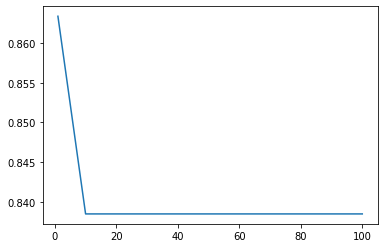

Best Score at C: 1
Final accuracy on train data: 0.996875
Final accuracy on test data: 0.8385093167701864


In [ ]:
from sklearn import svm

C_values=[1,10,40,60,100]
test_scores = []

for C in C_values:
    SVM = svm.SVC(C = C, kernel='linear', probability=True, degree=3, gamma='auto')
    SVM.fit(X_train_w2v,y_train_w2v)
    y_pred = SVM.predict(X_test_w2v)
    test_scores.append(accuracy_score(y_test_w2v,y_pred))
    
optimal_C_SVM = plotHyperparameterScores(C_values,test_scores,"accuracy","C")
SVM_modelW2v = svm.SVC(C = C, kernel='linear', probability=True, degree=3, gamma='auto')
SVM_modelW2v.fit(X_train_w2v, y_train_w2v)

y_predTrain= SVM_modelW2v.predict(X_train_w2v)
y_predTest = SVM_modelW2v.predict(X_test_w2v)
accTrain = accuracy_score(y_train_w2v, y_predTrain)
accTest = accuracy_score(y_test_w2v, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on test data:",accTest)

In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix: ')
confusion_matrix(y_test_w2v,y_predTest)

Confusion matrix: 


array([[73,  8],
       [18, 62]])

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test_w2v,y_predTest), columns=['Predicted Negatif', "Predicted Positif"], index=['Actual Negatif', 'Actual Positif'])

,Predicted Negatif,Predicted Positif
Actual Negatif,73,8
Actual Positif,18,62


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_w2v,y_predTest))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        81
           1       0.89      0.78      0.83        80

    accuracy                           0.84       161
   macro avg       0.84      0.84      0.84       161
weighted avg       0.84      0.84      0.84       161



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_w2v,y_predTest).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 62
False Positives: 8
True Negatives: 73
False Negatives: 18


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
probas = SVM_modelW2v.fit(X_train_w2v, y_train_w2v).predict_proba(X_test_w2v)

In [ ]:
auc = roc_auc_score(y_test_w2v, probas[:, 1])
print('AUC: %.2f' % auc)

AUC: 0.92


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_w2v, probas[:, 1])

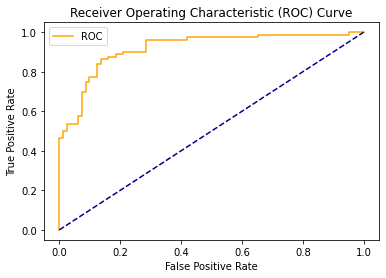

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

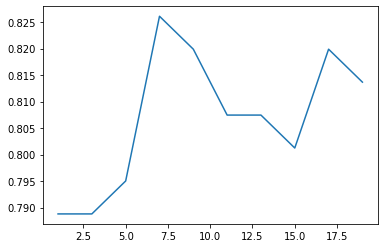

Best Score at K: 7
Final accuracy on train data: 0.8375
Final accuracy on test data: 0.8260869565217391


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1,20,2)
test_scores= []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform", p=2)
    knn.fit(X_train_w2v,y_train_w2v)
    y_pred = knn.predict(X_test_w2v)
    test_scores.append(accuracy_score(y_test_w2v,y_pred))
    
optimal_k = plotHyperparameterScores(k_values,test_scores,"accuracy","K")
knn_model = KNeighborsClassifier(n_neighbors=optimal_k, weights="uniform", p=2)
knn_model.fit(X_train_w2v, y_train_w2v)

y_predTrain= knn_model.predict(X_train_w2v)
y_predTest = knn_model.predict(X_test_w2v)
accTrain = accuracy_score(y_train_w2v, y_predTrain)
accTest = accuracy_score(y_test_w2v, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on test data:",accTest)

In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix: ')
confusion_matrix(y_test_w2v,y_predTest)

Confusion matrix: 


array([[69, 12],
       [16, 64]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_w2v,y_predTest))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        81
           1       0.84      0.80      0.82        80

    accuracy                           0.83       161
   macro avg       0.83      0.83      0.83       161
weighted avg       0.83      0.83      0.83       161



In [ ]:
probas = knn_model.fit(X_train_w2v, y_train_w2v).predict_proba(X_test_w2v)

In [ ]:
auc = roc_auc_score(y_test_w2v, probas[:, 1])
print('AUC: %.2f' % auc)

AUC: 0.87


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_w2v, probas[:, 1])

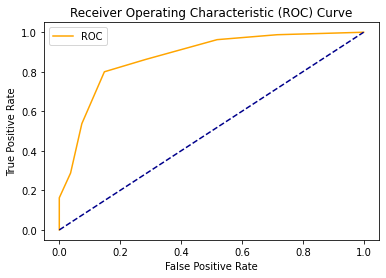

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [ ]:
dt = pd.read_excel('/content/drive/My Drive/ml_data/test_v1.xlsx')
#dt['hasilSVM'] = predictions_NB
dt['hasilKNN'] = y_predTest
dt.head()

,Tweet,Sentimen,hasilKNN
0,"Doaku semoga covid-19 segara beres, agar semua...",Positif,0
1,Makanya pemerintah perlu permudah akses untuk ...,Positif,0
2,Kemaren bapaku debat sama tetangga soal peratu...,Positif,0
3,Lagi mendukung upaya pemerintah menghadapi cov...,Positif,1
4,"hidupnanindah,Semoga dengan berdirinya Rumkitl...",Positif,1


In [ ]:
dt.groupby('hasilKNN').size()

hasilKNN
0    85
1    76
dtype: int64

In [ ]:
ds = pd.read_excel('/content/drive/My Drive/ml_data/test_v1.xlsx')
ds['hasilSVM'] = y_predTest
ds.head()

,Tweet,Sentimen,hasilSVM
0,"Doaku semoga covid-19 segara beres, agar semua...",Positif,0
1,Makanya pemerintah perlu permudah akses untuk ...,Positif,0
2,Kemaren bapaku debat sama tetangga soal peratu...,Positif,0
3,Lagi mendukung upaya pemerintah menghadapi cov...,Positif,1
4,"hidupnanindah,Semoga dengan berdirinya Rumkitl...",Positif,1


In [ ]:
ds.groupby('hasilSVM').size()

hasilSVM
0    85
1    76
dtype: int64

In [ ]:
dt['hasilSVM'] = y_predTest
dt.head(10)

,Tweet,Sentimen,hasilKNN,hasilSVM
0,"Doaku semoga covid-19 segara beres, agar semua...",Positif,0,0
1,Makanya pemerintah perlu permudah akses untuk ...,Positif,0,0
2,Kemaren bapaku debat sama tetangga soal peratu...,Positif,0,0
3,Lagi mendukung upaya pemerintah menghadapi cov...,Positif,1,1
4,"hidupnanindah,Semoga dengan berdirinya Rumkitl...",Positif,1,1
5,"Meski mudik tetap dilarang, pemerintah kemungk...",Positif,0,0
6,"Betuul. Tetap hidup sehat, ikuti protokol penc...",Positif,0,0
7,iar aja Gak turun...yg pentingnya duitnya ada....,Positif,0,0
8,Halo teman-teman. Penyebaran virus covid-19 se...,Positif,0,0
9,"sma 11,ga coret2 og,cuman ttd temen2 sekelas t...",Positif,0,0


In [ ]:
75

75

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya
i=1        #ini gapenting, cuma buat nandain fold nya.

KFold(n_splits=5, random_state=None, shuffle=False)


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
SVM = svm.SVC(C = C, kernel='linear', probability=True, degree=3, gamma='auto')
score= cross_val_score(SVM, X_train_w2v, y_train_w2v, cv=10, scoring='accuracy') 
print(score)        
print(score.mean())

[0.8125   0.78125  0.921875 0.828125 0.796875 0.703125 0.71875  0.84375
 0.78125  0.75    ]
0.79375


In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=k, weights="uniform", p=2)
score= cross_val_score(knn, X_train_w2v, y_train_w2v, cv=10, scoring='accuracy') 
print(score)        
print(score.mean())

[0.75     0.734375 0.84375  0.859375 0.765625 0.796875 0.78125  0.75
 0.796875 0.75    ]
0.7828125
